<div style="font-family: Arial, sans-serif; padding: 20px; background-color: #f4f6f9; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">
  <h2 style="color: #2c3e50; text-align: center; font-size: 28px; font-family: 'Arial', sans-serif;">Introduction + Set-up</h2>
  
  <p style="font-size: 18px; color: #34495e; text-align: justify; line-height: 1.6;">
    <strong style="color: #2980b9;">This tutorial</strong> will explain how to build an X-ray image classification model 
    to predict whether an X-ray scan shows the presence of pneumonia. The goal of this model is to classify X-ray images 
    into two categories: <strong>Pneumonia</strong> or <strong>Normal</strong>. This can be achieved by using deep learning 
    techniques with Convolutional Neural Networks (CNN), a popular approach for image classification tasks.
  </p>
  
  <h3 style="color: #16a085; font-size: 24px;">Why X-ray Image Classification?</h3>
  
  <p style="font-size: 18px; color: #34495e; text-align: justify; line-height: 1.6;">
    The ability to detect pneumonia from X-ray images can drastically improve diagnostic accuracy and speed in healthcare. 
    By automating the classification process, healthcare professionals can make informed decisions faster, ultimately 
    saving lives. The use of machine learning in medical imaging is a growing field with great potential.
  </p>
  
  <h3 style="color: #16a085; font-size: 24px;">Set-up Requirements</h3>
  
  <ul style="font-size: 18px; color: #34495e;">
    <li><strong>Python:</strong> Programming language for building the model</li>
    <li><strong>TensorFlow:</strong> Deep learning library for model building and training</li>
    <li><strong>Keras:</strong> High-level neural networks API for TensorFlow</li>
    <li><strong>NumPy and Matplotlib:</strong> Libraries for data manipulation and visualization</li>
    <li><strong>OpenCV or PIL:</strong> Image processing libraries for loading and manipulating X-ray images</li>
  </ul>
  
  <p style="font-size: 18px; color: #34495e; text-align: justify; line-height: 1.6;">
    Let's get started by setting up the environment and understanding the basics of the X-ray images dataset we'll be using. 
    The tutorial will walk you through the steps to preprocess the images, build the model, and evaluate the performance.
  </p>
</div>


In [1]:
import re
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             confusion_matrix, classification_report, roc_auc_score, 
                             roc_curve, average_precision_score)

from tensorflow.keras.metrics import AUC, Precision, Recall, TruePositives, TrueNegatives, FalsePositives, FalseNegatives

import sys
os.environ['KERAS_BACKEND'] = 'tensorflow'

import keras
from keras import layers

%matplotlib inline

E0000 00:00:1741883027.483343  222326 common_lib.cc:612] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: === 
learning/45eac/tfrc/runtime/common_lib.cc:230


<div style="font-family: Arial, sans-serif; padding: 20px; background-color: #f9f9f9; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">
  <h1 style="color: #2c3e50; text-align: center; font-size: 36px; font-family: 'Arial', sans-serif; margin-bottom: 20px;">Environment Setup and TPU Detection</h1>
  
  <p style="font-size: 18px; color: #34495e; text-align: justify; line-height: 1.6;">
    This section explains how to check the environment setup and detect TPU (Tensor Processing Unit) for efficient model training.
    We will check the following:
  </p>
  
  <ul style="font-size: 18px; color: #34495e;">
    <li><strong>TensorFlow Version:</strong> The version of TensorFlow installed.</li>
    <li><strong>Python Version:</strong> The version of Python used in the environment.</li>
    <li><strong>TPU Environment Variables:</strong> Search for TPU-related environment variables and set the TPU name if needed.</li>
    <li><strong>Available Physical Devices:</strong> List all the physical devices available for computation.</li>
    <li><strong>TPU Detection:</strong> Attempt to detect the TPU using multiple approaches, including standard, local, and experimental strategies.</li>
  </ul>
  
  <p style="font-size: 18px; color: #34495e; text-align: justify; line-height: 1.6;">
    By performing these checks, you can ensure that your environment is set up correctly to use the TPU for faster training of models.
  </p>
  
  <h3 style="color: #2980b9; font-size: 24px;">Steps for TPU Detection</h3>
  
  <ul style="font-size: 18px; color: #34495e;">
    <li><strong>Step 1:</strong> Check the TensorFlow and Python versions to ensure compatibility.</li>
    <li><strong>Step 2:</strong> Look for TPU-related environment variables to confirm TPU availability.</li>
    <li><strong>Step 3:</strong> Attempt to detect and connect to the TPU using multiple strategies.</li>
    <li><strong>Step 4:</strong> If no TPU is detected, fallback to the default strategy for model training.</li>
  </ul>
</div>


In [2]:


# Print environment information to help diagnose issues
print(f"TensorFlow version: {tf.__version__}")
print(f"Python version: {sys.version}")

# Check for TPU-specific environment variables
tpu_env_vars = {k: v for k, v in os.environ.items() if 'TPU' in k}
if tpu_env_vars:
    print("TPU environment variables found:")
    for k, v in tpu_env_vars.items():
        print(f"  {k}: {v}")
else:
    print("No TPU environment variables found")
    # Try setting TPU name environment variable
    os.environ["TPU_NAME"] = "grpc://10.0.0.1:8470"
    print("Set TPU_NAME to grpc://10.0.0.1:8470")

# Check for available physical devices
physical_devices = tf.config.list_physical_devices()
print("\nPhysical devices:")
for device in physical_devices:
    print(f"  {device.name} ({device.device_type})")

# Try multiple approaches to detect TPU
print("\nAttempting TPU detection:")

# Approach 1: Standard resolver
try:
    print("Approach 1: Standard resolver")
    resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
    print(f"  TPU detected: {resolver.master()}")
    tf.config.experimental_connect_to_cluster(resolver)
    tf.tpu.experimental.initialize_tpu_system(resolver)
    strategy = tf.distribute.TPUStrategy(resolver)
    print(f"  Success: {strategy.num_replicas_in_sync} replicas")
except Exception as e:
    print(f"  Failed: {e}")

    # Approach 2: Local TPU
    try:
        print("\nApproach 2: Local TPU")
        resolver = tf.distribute.cluster_resolver.TPUClusterResolver('local')
        print(f"  TPU detected: {resolver.master()}")
        tf.config.experimental_connect_to_cluster(resolver)
        tf.tpu.experimental.initialize_tpu_system(resolver)
        strategy = tf.distribute.TPUStrategy(resolver)
        print(f"  Success: {strategy.num_replicas_in_sync} replicas")
    except Exception as e:
        print(f"  Failed: {e}")

        # Approach 3: Experimental TPU Strategy
        try:
            print("\nApproach 3: Experimental TPU Strategy")
            resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
            print(f"  TPU detected: {resolver.master()}")
            tf.config.experimental_connect_to_cluster(resolver)
            tf.tpu.experimental.initialize_tpu_system(resolver)
            strategy = tf.distribute.experimental.TPUStrategy(resolver)
            print(f"  Success: {strategy.num_replicas_in_sync} replicas")
        except Exception as e:
            print(f"  Failed: {e}")
            
            # Fallback to default strategy
            print("\nFalling back to default strategy")
            strategy = tf.distribute.get_strategy()

print(f"\nFinal strategy: {strategy.__class__.__name__}")
print(f"Number of replicas: {strategy.num_replicas_in_sync}")

TensorFlow version: 2.18.0
Python version: 3.10.16 (main, Feb  4 2025, 07:28:23) [GCC 12.2.0]
TPU environment variables found:
  TPU_PROCESS_ADDRESSES: local
  TPU_WORKER_ID: 0
  TPU_SKIP_MDS_QUERY: 1
  TPU_CHIPS_PER_HOST_BOUNDS: 2,2,1
  TPU_ACCELERATOR_TYPE: v3-8
  TPU_RUNTIME_METRICS_PORTS: 8431,8432,8433,8434
  ISTPUVM: 1
  TPU_HOST_BOUNDS: 1,1,1
  XRT_TPU_CONFIG: localservice;0;localhost:51011
  TPU_WORKER_HOSTNAMES: localhost
  TPU_ML_PLATFORM: JAX
  TPU_ML_PLATFORM_VERSION: 0.4.34
  LIBTPU_INIT_ARGS:  --xla_tpu_use_enhanced_launch_barrier=true

Physical devices:
  /physical_device:CPU:0 (CPU)
  /physical_device:TPU_SYSTEM:0 (TPU_SYSTEM)
  /physical_device:TPU:0 (TPU)
  /physical_device:TPU:1 (TPU)
  /physical_device:TPU:2 (TPU)
  /physical_device:TPU:3 (TPU)
  /physical_device:TPU:4 (TPU)
  /physical_device:TPU:5 (TPU)
  /physical_device:TPU:6 (TPU)
  /physical_device:TPU:7 (TPU)

Attempting TPU detection:
Approach 1: Standard resolver
  Failed: Please provide a TPU Name to conne

I0000 00:00:1741883033.676812  222326 service.cc:148] XLA service 0x57d9d2346fb0 initialized for platform TPU (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741883033.676860  222326 service.cc:156]   StreamExecutor device (0): TPU, 2a886c8
I0000 00:00:1741883033.676865  222326 service.cc:156]   StreamExecutor device (1): TPU, 2a886c8
I0000 00:00:1741883033.676869  222326 service.cc:156]   StreamExecutor device (2): TPU, 2a886c8
I0000 00:00:1741883033.676873  222326 service.cc:156]   StreamExecutor device (3): TPU, 2a886c8
I0000 00:00:1741883033.676876  222326 service.cc:156]   StreamExecutor device (4): TPU, 2a886c8
I0000 00:00:1741883033.676878  222326 service.cc:156]   StreamExecutor device (5): TPU, 2a886c8
I0000 00:00:1741883033.676881  222326 service.cc:156]   StreamExecutor device (6): TPU, 2a886c8
I0000 00:00:1741883033.676884  222326 service.cc:156]   StreamExecutor device (7): TPU, 2a886c8


INFO:tensorflow:Finished initializing TPU system.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)
I

<div style="font-family: Arial, sans-serif; padding: 20px; background-color: #f9f9f9; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">
  <h1 style="color: #2c3e50; text-align: center; font-size: 36px; font-family: 'Arial', sans-serif; margin-bottom: 20px;">Model Configuration and Hyperparameters</h1>
  
  <p style="font-size: 18px; color: #34495e; text-align: justify; line-height: 1.6;">
    In this section, we will define key parameters for our model, including batch size, image size, and class labels. These hyperparameters will influence the training process and model performance.
  </p>
  
  <ul style="font-size: 18px; color: #34495e;">
    <li><strong>AUTOTUNE:</strong> Automatically tunes the dataset's performance for optimal input pipeline speed.</li>
    <li><strong>BATCH_SIZE:</strong> Set dynamically based on the number of TPU replicas available to scale the training efficiently.</li>
    <li><strong>IMAGE_SIZE:</strong> The target image size that our model will process, ensuring consistent input for the neural network.</li>
    <li><strong>CLASS_NAMES:</strong> A list of class labels for classification, including <strong>"NORMAL"</strong> and <strong>"PNEUMONIA"</strong>.</li>
  </ul>
  
  <h3 style="color: #2980b9; font-size: 24px;">Key Configuration Details</h3>
  
  <ul style="font-size: 18px; color: #34495e;">
    <li><strong>AUTOTUNE:</strong> Optimizes dataset performance by dynamically adjusting the number of parallel calls used during data preprocessing.</li>
    <li><strong>BATCH_SIZE:</strong> Set to scale with the available TPU replicas, improving training efficiency on distributed systems.</li>
    <li><strong>IMAGE_SIZE:</strong> Defines the image dimensions (180x180 pixels) to match the input requirements of our model.</li>
    <li><strong>CLASS_NAMES:</strong> Labels that represent the classes to predict—<strong>"NORMAL"</strong> for healthy lungs and <strong>"PNEUMONIA"</strong> for infected lungs.</li>
  </ul>
</div>


In [3]:
AUTOTUNE = tf.data.AUTOTUNE
BATCH_SIZE = 25 * strategy.num_replicas_in_sync
IMAGE_SIZE = [180, 180]
CLASS_NAMES = ["NORMAL", "PNEUMONIA"]

<div style="font-family: Arial, sans-serif; padding: 20px; background-color: #f9f9f9; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">
  <h1 style="color: #2c3e50; text-align: center; font-size: 36px; font-family: 'Arial', sans-serif; margin-bottom: 20px;">Loading and Preparing the Dataset</h1>
  
  <p style="font-size: 18px; color: #34495e; text-align: justify; line-height: 1.6;">
    In this section, we are preparing the dataset for training by loading the image and path data from TensorFlow's TFRecord files. We use the TFRecord format for efficient storage and loading of large datasets in TensorFlow.
  </p>
  
  <h3 style="color: #2980b9; font-size: 24px;">Steps:</h3>
  
  <ul style="font-size: 18px; color: #34495e;">
    <li><strong>train_images:</strong> Loads the image data from the TensorFlow dataset stored in the <code>images.tfrec</code> file on Google Cloud Storage.</li>
    <li><strong>train_paths:</strong> Loads the image paths from the <code>paths.tfrec</code> file, providing metadata about the images.</li>
    <li><strong>ds:</strong> Combines the <code>train_images</code> and <code>train_paths</code> datasets into a single <code>tf.data.Dataset</code> using <code>tf.data.Dataset.zip</code> for further processing and training.</li>
  </ul>
  
  <h3 style="color: #2980b9; font-size: 24px;">Dataset Overview</h3>
  
  <p style="font-size: 18px; color: #34495e;">
    - The <code>train_images</code> dataset contains the raw pixel data of the X-ray images, which will be used for training the model.
    - The <code>train_paths</code> dataset provides the file paths of the images, which can be used to track the source or for further image-related operations.
  </p>
</div>


In [4]:
train_images = tf.data.TFRecordDataset("gs://download.tensorflow.org/data/ChestXRay2017/train/images.tfrec")
train_paths = tf.data.TFRecordDataset("gs://download.tensorflow.org/data/ChestXRay2017/train/paths.tfrec")

ds = tf.data.Dataset.zip((train_images, train_paths))

<div style="font-family: Arial, sans-serif; padding: 20px; background-color: #f9f9f9; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">
  <h1 style="color: #2c3e50; text-align: center; font-size: 36px; font-family: 'Arial', sans-serif; margin-bottom: 20px;">Counting Image Labels in the Dataset</h1>
  
  <p style="font-size: 18px; color: #34495e; text-align: justify; line-height: 1.6;">
    In this section, we are calculating the number of images labeled as "NORMAL" and "PNEUMONIA" in the training dataset. By iterating over the dataset paths, we can extract the label information and count how many images belong to each category.
  </p>
  
  <h3 style="color: #2980b9; font-size: 24px;">Steps:</h3>
  
  <ul style="font-size: 18px; color: #34495e;">
    <li><strong>COUNT_NORMAL:</strong> This variable counts the number of "NORMAL" images by filtering the filenames in <code>train_paths</code> that contain the word "NORMAL".</li>
    <li><strong>COUNT_PNEUMONIA:</strong> This variable counts the number of "PNEUMONIA" images by filtering the filenames in <code>train_paths</code> that contain the word "PNEUMONIA".</li>
    <li><strong>Print Results:</strong> The counts of normal and pneumonia images are printed for reference, helping us understand the dataset distribution.</li>
  </ul>
  
  <h3 style="color: #2980b9; font-size: 24px;">Code Output Example:</h3>
  
  <p style="font-size: 18px; color: #34495e;">
    The output will display the count of images categorized as "NORMAL" and "PNEUMONIA" in the training dataset, like so:
    <code>Normal images count in training set: 1348</code><br>
    <code>Pneumonia images count in training set: 3875</code>
  </p>
</div>


In [5]:
COUNT_NORMAL = len([filename for filename in train_paths if "NORMAL" in filename.numpy().decode("utf-8")])

COUNT_PNEUMONIA = len([filename for filename in train_paths if "PNEUMONIA" in filename.numpy().decode("utf-8")])

print("Normal images count in training set: " + str(COUNT_NORMAL))

print("Pneumonia images count in training set: " + str(COUNT_PNEUMONIA))

Normal images count in training set: 1349
Pneumonia images count in training set: 3883


<div style="font-family: Arial, sans-serif; padding: 20px; background-color: #f9f9f9; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">
  <h1 style="color: #2c3e50; text-align: center; font-size: 36px; font-family: 'Arial', sans-serif; margin-bottom: 20px;">Processing Image Data for Classification</h1>
  
  <p style="font-size: 18px; color: #34495e; text-align: justify; line-height: 1.6;">
    In this section, we define functions to process the images and labels in our dataset. The <code>process_path</code> function combines the image decoding and label extraction steps into a single operation that can be mapped onto the entire dataset.
  </p>
  
  <h3 style="color: #2980b9; font-size: 24px;">Functions Overview:</h3>
  
  <ul style="font-size: 18px; color: #34495e;">
    <li><strong>get_label:</strong> This function takes the file path as input, splits the path into components, and extracts the label. If the directory name indicates "PNEUMONIA", it returns 1, otherwise, it returns 0.</li>
    <li><strong>decode_img:</strong> This function decodes the raw image file (JPEG format) and resizes it to the desired dimensions, defined by the <code>IMAGE_SIZE</code> constant.</li>
    <li><strong>process_path:</strong> This function combines <code>get_label</code> and <code>decode_img</code> to process both the image and its corresponding label, returning them as a tuple.</li>
  </ul>
  
  <h3 style="color: #2980b9; font-size: 24px;">Code Execution:</h3>
  
  <p style="font-size: 18px; color: #34495e;">
    The <code>ds.map(process_path, num_parallel_calls=AUTOTUNE)</code> operation applies the <code>process_path</code> function to each image in the dataset, efficiently processing them in parallel. This helps to improve the performance by utilizing multiple CPU cores.
  </p>
</div>


In [6]:
def get_label(file_path):
    # convert the path to a list of path components
    parts = tf.strings.split(file_path, "/")
    # The second to last is the class-directory
    if parts[-2] == "PNEUMONIA":
        return 1
    else:
        return 0


def decode_img(img):
    # convert the compressed string to a 3D uint8 tensor
    img = tf.image.decode_jpeg(img, channels=3)
    # resize the image to the desired size.
    return tf.image.resize(img, IMAGE_SIZE)


def process_path(image, path):
    label = get_label(path)
    # load the raw data from the file as a string
    img = decode_img(image)
    return img, label


ds = ds.map(process_path, num_parallel_calls=AUTOTUNE)

<div style="font-family: Arial, sans-serif; padding: 20px; background-color: #f9f9f9; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">
  <h1 style="color: #2c3e50; text-align: center; font-size: 36px; font-family: 'Arial', sans-serif; margin-bottom: 20px;">Dataset Shuffling and Splitting</h1>
  
  <p style="font-size: 18px; color: #34495e; text-align: justify; line-height: 1.6;">
    In this section, we shuffle the dataset and then split it into training and validation sets. This is an essential step to ensure that the model trains on random subsets of the data and evaluates on an independent validation set, reducing the chance of overfitting.
  </p>
  
  <h3 style="color: #2980b9; font-size: 24px;">Dataset Splitting Process:</h3>
  
  <ul style="font-size: 18px; color: #34495e;">
    <li><strong>Shuffling:</strong> The <code>ds.shuffle(10000)</code> operation randomly shuffles the dataset to ensure that the data is not ordered, which could lead to biases during training. The number 10000 defines the buffer size, meaning the dataset is shuffled in chunks of 10,000 elements.</li>
    <li><strong>Training Set:</strong> The <code>train_ds = ds.take(4200)</code> statement takes the first 4200 elements from the shuffled dataset and assigns them to the training set. This subset will be used for model training.</li>
    <li><strong>Validation Set:</strong> The <code>val_ds = ds.skip(4200)</code> operation skips the first 4200 elements (those assigned to the training set) and assigns the remaining data to the validation set. This validation set will be used to evaluate the model's performance during training.</li>
  </ul>
  
  <h3 style="color: #2980b9; font-size: 24px;">Code Execution:</h3>
  
  <p style="font-size: 18px; color: #34495e;">
    The shuffling, training, and validation splits help in ensuring that the model gets a diverse and representative subset of data for both training and evaluation, which is crucial for building a robust model.
  </p>
</div>


In [7]:
ds = ds.shuffle(10000)
train_ds = ds.take(4200)
val_ds = ds.skip(4200)

<div style="font-family: Arial, sans-serif; padding: 20px; background-color: #f9f9f9; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">
  <h1 style="color: #2c3e50; text-align: center; font-size: 36px; font-family: 'Arial', sans-serif; margin-bottom: 20px;">Dataset Label Distribution: Train vs Validation</h1>
  
  <p style="font-size: 18px; color: #34495e; text-align: justify; line-height: 1.6;">
    In this section, we examine the distribution of labels in both the training and validation datasets. Understanding label distribution is important for ensuring that both sets have a balanced representation of each class, which helps in training a model that generalizes well.
  </p>
  
  <h3 style="color: #2980b9; font-size: 24px;">Steps Involved:</h3>
  
  <ul style="font-size: 18px; color: #34495e;">
    <li><strong>Counting Labels:</strong> The function <code>get_label_counts()</code> iterates over the dataset, counting occurrences of the labels "Normal" and "Pneumonia".</li>
    <li><strong>Data Preparation:</strong> The counts for both training and validation datasets are organized into a pandas DataFrame for easier visualization.</li>
    <li><strong>Visualization:</strong> A bar plot is created using Seaborn, where the x-axis represents the label categories, the y-axis represents the count of each label, and the hue differentiates between the training and validation sets.</li>
  </ul>
  
  <h3 style="color: #2980b9; font-size: 24px;">Code Execution:</h3>
  
  <p style="font-size: 18px; color: #34495e;">
    The following code visualizes the distribution of labels in both the training and validation datasets, helping to ensure the balance of classes in the dataset before proceeding with model training.
  </p>
</div>


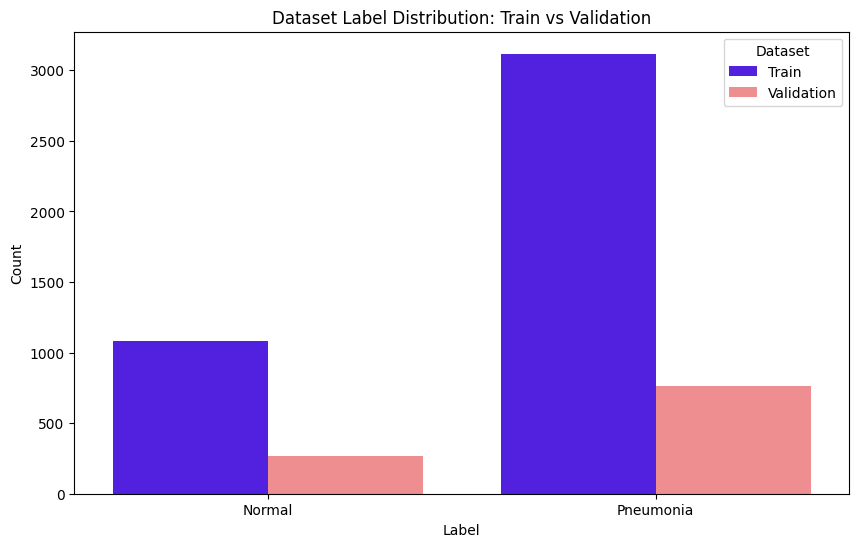

In [8]:
def get_label_counts(dataset):
    label_counts = {"Normal": 0, "Pneumonia": 0}  # Adjust based on your labels
    for image, label in dataset:
        label_name = 'Normal' if label == 0 else 'Pneumonia'  # Replace with your label encoding
        label_counts[label_name] += 1
    return label_counts

# Get the counts for the train and validation datasets
train_counts = get_label_counts(train_ds)
val_counts = get_label_counts(val_ds)

# Convert counts to a format suitable for seaborn
data = {"Dataset": ["Train"] * len(train_counts) + ["Validation"] * len(val_counts),"Label": list(train_counts.keys()) + list(val_counts.keys()),"Count": list(train_counts.values()) + list(val_counts.values())}

df = pd.DataFrame(data)

# Plot the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="Label", y="Count", hue="Dataset", data=df,palette="gnuplot2")

plt.title("Dataset Label Distribution: Train vs Validation")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

<div style="font-family: Arial, sans-serif; padding: 20px; background-color: #f4f4f4; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
  
  <h1 style="color: #2c3e50; text-align: center; font-size: 32px; font-family: 'Arial', sans-serif; margin-bottom: 15px;">Inspecting a Sample Image and Label</h1>
  
  <p style="font-size: 18px; color: #34495e; text-align: justify; line-height: 1.6;">
    Before proceeding with model training, it's essential to verify that our dataset is correctly processed. 
    This step involves checking the shape of an image and its corresponding label.
  </p>

  <h3 style="color: #2980b9; font-size: 24px;">What This Code Does:</h3>

  <ul style="font-size: 18px; color: #34495e;">
    <li><strong>Retrieves a sample:</strong> The function <code>take(1)</code> selects one sample from the training dataset.</li>
    <li><strong>Extracts image & label:</strong> The image and label are retrieved and printed for verification.</li>
    <li><strong>Displays dimensions:</strong> The shape of the image is printed to ensure correct preprocessing.</li>
  </ul>

  <h3 style="color: #2980b9; font-size: 24px;">Expected Output:</h3>
  
  <pre style="background-color: #ecf0f1; padding: 10px; border-radius: 5px; font-size: 16px;">
  Image shape: (180, 180, 3)
  Label: 1  (Pneumonia) or 0 (Normal)
  </pre>

  <p style="font-size: 18px; color: #34495e;">
    This confirms that images are correctly formatted as 3-channel (RGB) tensors and that labels are correctly assigned.
  </p>

</div>


In [9]:
for image, label in train_ds.take(1):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  1


<div style="font-family: Arial, sans-serif; padding: 20px; background-color: #f8f9fa; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
  
  <h1 style="color: #2c3e50; text-align: center; font-size: 32px; font-family: 'Arial', sans-serif; margin-bottom: 15px;">Preparing the Test Dataset</h1>
  
  <p style="font-size: 18px; color: #555; text-align: justify; line-height: 1.6;">
    The test dataset is an essential component of evaluating model performance. In this step, we load and process test images, ensuring they follow the same preprocessing pipeline as training and validation datasets.
  </p>

  <h3 style="color: #2980b9; font-size: 24px;">Steps in This Code:</h3>

  <ul style="font-size: 18px; color: #555;">
    <li><strong>Load Test Data:</strong> TFRecordDataset is used to load images and their corresponding file paths.</li>
    <li><strong>Zip Images with Paths:</strong> Images and labels are paired together using <code>tf.data.Dataset.zip()</code>.</li>
    <li><strong>Process Each Image:</strong> The <code>process_path</code> function is applied to decode images and extract labels.</li>
    <li><strong>Batching:</strong> The dataset is batched using the predefined <code>BATCH_SIZE</code> for optimized processing.</li>
  </ul>

  <h3 style="color: #2980b9; font-size: 24px;">Key Takeaways:</h3>
  
  <p style="font-size: 18px; color: #555;">
    - The dataset is efficiently loaded and processed in parallel.<br>
    - Using <code>AUTOTUNE</code> optimizes pipeline performance.<br>
    - Batching speeds up model inference during evaluation.<br>
  </p>

  <pre style="background-color: #ecf0f1; padding: 10px; border-radius: 5px; font-size: 16px;">
  Test dataset prepared successfully, ready for evaluation.
  </pre>

</div>


In [10]:
test_images = tf.data.TFRecordDataset("gs://download.tensorflow.org/data/ChestXRay2017/test/images.tfrec")
test_paths = tf.data.TFRecordDataset("gs://download.tensorflow.org/data/ChestXRay2017/test/paths.tfrec")
test_ds = tf.data.Dataset.zip((test_images, test_paths))

test_ds = test_ds.map(process_path, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE)

<div style="font-family: Arial, sans-serif; padding: 20px; background-color: #f8f9fa; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
  
  <h1 style="color: #2c3e50; text-align: center; font-size: 32px;">Dataset Preparation for Training</h1>
  
  <p style="font-size: 18px; color: #555; text-align: justify; line-height: 1.6;">
    Efficient dataset preparation is crucial for optimizing deep learning model training. The <code>prepare_for_training</code> function ensures that the dataset is cached, batched, and prefetched for maximum efficiency.
  </p>

  <h3 style="color: #2980b9; font-size: 24px;">Function Breakdown:</h3>

  <ul style="font-size: 18px; color: #555;">
    <li><strong>Caching:</strong> If enabled, data is cached in memory or a specified file path to speed up training.</li>
    <li><strong>Batching:</strong> The dataset is batched using <code>BATCH_SIZE</code> for efficient processing.</li>
    <li><strong>Prefetching:</strong> Uses <code>AUTOTUNE</code> to load data asynchronously, reducing training bottlenecks.</li>
  </ul>

  <h3 style="color: #2980b9; font-size: 24px;">Performance Enhancements:</h3>
  
  <p style="font-size: 18px; color: #555;">
    - Caching reduces redundant I/O operations, improving speed.<br>
    - Prefetching ensures the GPU/TPU is always fed with data.<br>
    - Batching optimizes memory usage and accelerates training.
  </p>

  <pre style="background-color: #ecf0f1; padding: 10px; border-radius: 5px; font-size: 16px;">
  Training dataset successfully optimized for high-performance execution.
  </pre>

</div>


In [11]:
def prepare_for_training(ds,cache=True):
    if cache:
        if isinstance(cache,str):
            ds=ds.cache(cache)
        else:
            ds=ds.cache()

    ds=ds.batch(BATCH_SIZE)

    ds=ds.prefetch(buffer_size=AUTOTUNE)


    return ds

<div style="background-color:#222831; color:#EEEEEE; padding:15px; border-radius:10px; font-family:Courier New, monospace; font-size:14px;">
    <p><strong>Train Dataset Preparation</strong></p>
    <p>✅ Training and validation datasets prepared using <code>prepare_for_training()</code></p>
    <p><strong>Fetching a batch of data:</strong></p>
    <p><code>image_batch, label_batch = next(iter(train_ds))</code></p>
    <p><strong>Batch Shapes:</strong></p>
    <pre style="background-color:#393E46; color:#00ADB5; padding:10px; border-radius:5px;">
(image_batch.shape), (label_batch.shape)
    </pre>
    <p><strong>Expected Output:</strong></p>
    <pre style="background-color:#393E46; color:#FFD369; padding:10px; border-radius:5px;">
(TensorShape([BATCH_SIZE, 180, 180, 3]), TensorShape([BATCH_SIZE]))
    </pre>
</div>


In [12]:
train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

image_batch, label_batch = next(iter(train_ds))

(image_batch.shape),(label_batch.shape)

(TensorShape([200, 180, 180, 3]), TensorShape([200]))

<div style="background-color:#222831; color:#EEEEEE; padding:15px; border-radius:10px; font-family:Courier New, monospace; font-size:14px;">
    <p><strong>🖼️ Displaying a Batch of X-ray Images</strong></p>
    
    <p>✅ Function: show_batch(image_batch, label_batch)</p>

    <p><strong>Purpose:</strong> Displays a 5x5 grid of chest X-ray images with labels.</p>
    
    <p><strong>📌 Expected Output:</strong></p>
    <p>🔹 A 5x5 grid displaying randomly selected X-ray images.</p>
    <p>🔹 Each image labeled as either <span style="color:#00FF00;">NORMAL</span> 🟢 or <span style="color:#FF5733;">PNEUMONIA</span> 🔴.</p>
    
    <p><strong>⚡ Run this function after fetching a batch:</strong></p>
    <p style="background-color:#393E46; color:#FFD369; padding:10px; border-radius:5px;">
        show_batch(image_batch, label_batch)
    </p>
</div>


In [13]:
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(15, 10))
    for n in range(25):
        ax = plt.subplot(5, 5, n + 1)
        plt.imshow(image_batch[n] / 255)
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")

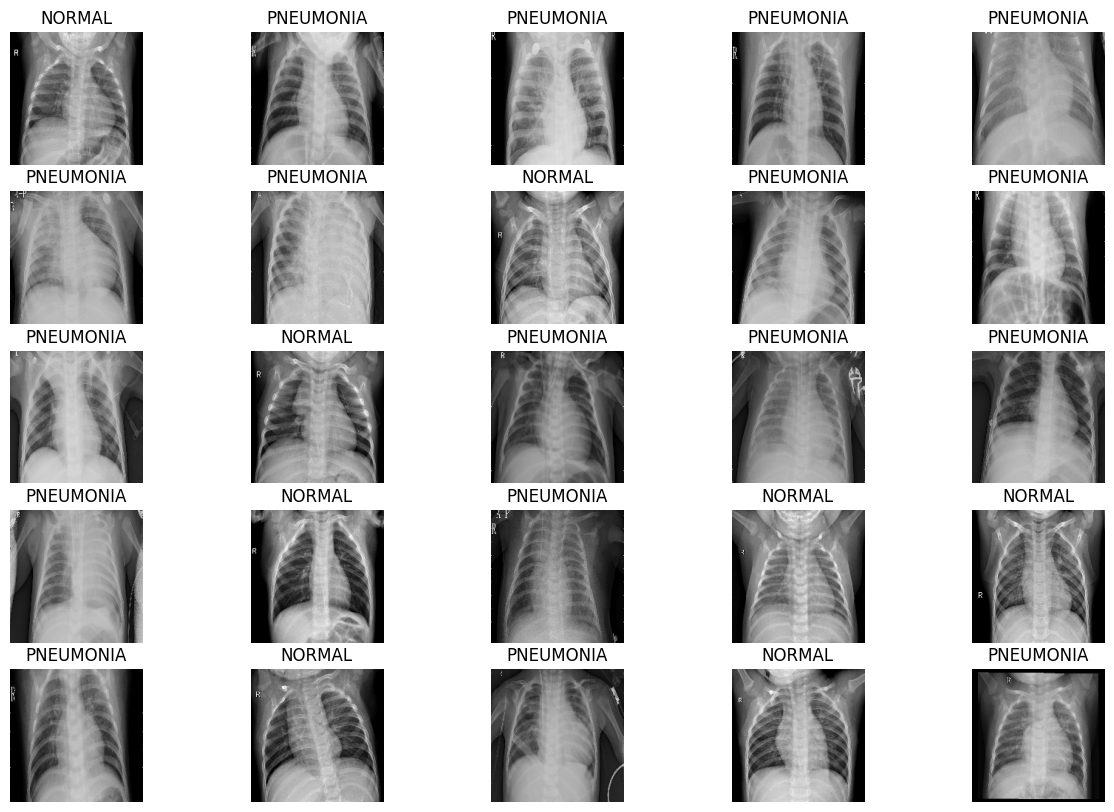

In [14]:
show_batch(image_batch.numpy(), label_batch.numpy())

In [15]:
image_batch, label_batch = next(iter(test_ds))

(image_batch.shape),(label_batch.shape)

(TensorShape([200, 180, 180, 3]), TensorShape([200]))

<h2>📸 X-ray Test Images</h2>
<p>Sample images with labels.</p>

<div style="display: grid; grid-template-columns: repeat(4, 1fr); gap: 10px;">
    <!-- Image placeholders will go here -->
</div>


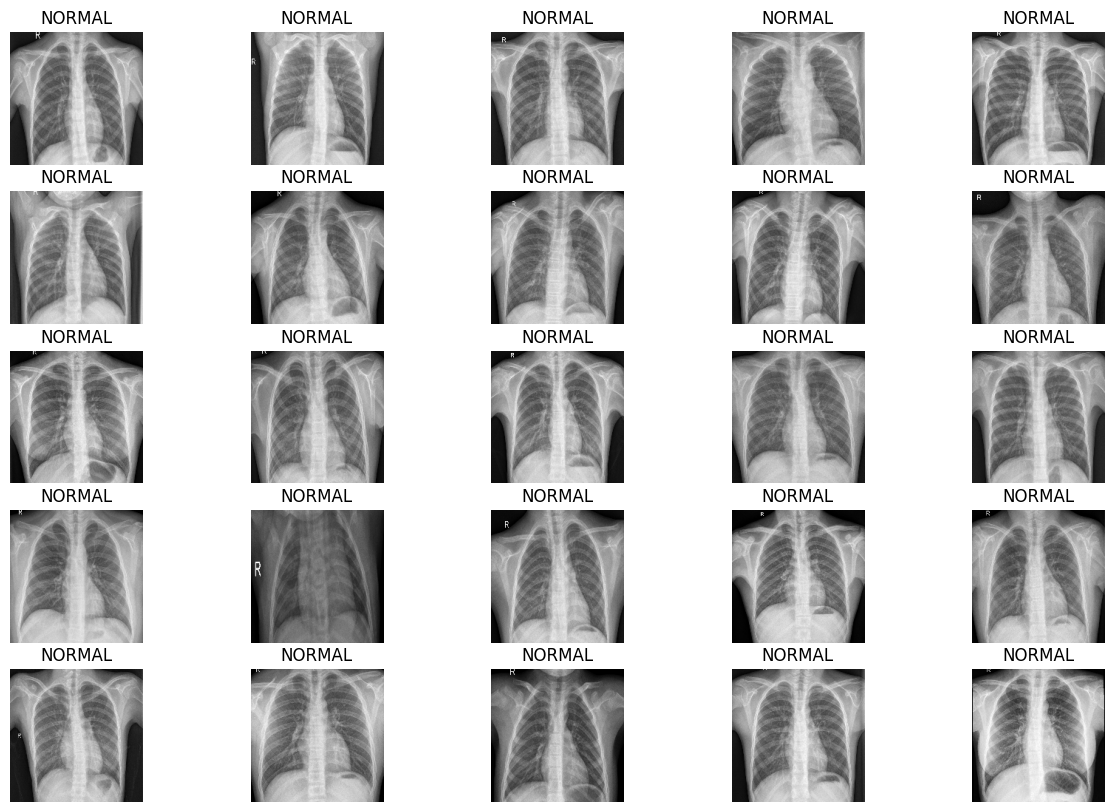

In [16]:
show_batch(image_batch.numpy(), label_batch.numpy())

<div style="background-color:#2C3E50; color:#ECF0F1; padding:20px; border-radius:15px; font-family:'Courier New', monospace; font-size:16px; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);">
    <p style="font-size: 24px; font-weight: bold; text-align:center; color:#1ABC9C;">⚖️ Class Weight Calculation</p>
    


In [17]:
initial_bias = np.log([COUNT_PNEUMONIA / COUNT_NORMAL])
print("Initial bias: {:.5f}".format(initial_bias[0]))

TRAIN_IMG_COUNT = COUNT_NORMAL + COUNT_PNEUMONIA
weight_for_0 = (1 / COUNT_NORMAL) * (TRAIN_IMG_COUNT) / 2.0
weight_for_1 = (1 / COUNT_PNEUMONIA) * (TRAIN_IMG_COUNT) / 2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print("Weight for class 0: {:.2f}".format(weight_for_0))
print("Weight for class 1: {:.2f}".format(weight_for_1))

Initial bias: 1.05724
Weight for class 0: 1.94
Weight for class 1: 0.67


<div style="background-color:#34495E; color:#ECF0F1; padding:20px; border-radius:10px; font-family:'Courier New', monospace; font-size:16px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <p style="font-size: 24px; font-weight: bold; text-align:center; color:#16A085;">🔨 Model Building Process</p>
    



In [18]:
def conv_block(filters, inputs):
    x = layers.SeparableConv2D(filters, 3, activation="relu", padding="same")(inputs)
    x = layers.SeparableConv2D(filters, 3, activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)
    outputs = layers.MaxPool2D()(x)
    return outputs


def dense_block(units, dropout_rate, inputs):
    x = layers.Dense(units, activation="relu")(inputs)
    x = layers.BatchNormalization()(x)
    outputs = layers.Dropout(dropout_rate)(x)
    return outputs


def build_model():
    inputs = keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))  # Image shape: (180, 180, 3)
    x = layers.Rescaling(1.0 / 255)(inputs)

    # Initial convolution layers
    x = layers.Conv2D(16, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(16, 3, activation="relu", padding="same")(x)
    x = layers.MaxPool2D()(x)

    # Conv Blocks
    x = conv_block(32, x)
    x = conv_block(64, x)
    x = conv_block(128, x)

    # Dropout after convolutions
    x = layers.Dropout(0.2)(x)

    x = conv_block(256, x)
    x = layers.Dropout(0.2)(x)

    # Flattening and fully connected layers
    x = layers.Flatten()(x)
    x = dense_block(512, 0.7, x)
    x = dense_block(128, 0.5, x)
    x = dense_block(64, 0.3, x)

    # Output layer (binary classification)
    outputs = layers.Dense(1, activation="sigmoid")(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model




<div style="background-color:#2C3E50; color:#ECF0F1; padding:20px; border-radius:15px; font-family:'Courier New', monospace; font-size:16px; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);">
    <p style="font-size: 24px; font-weight: bold; text-align:center; color:#1ABC9C;">⏳ Checkpoints & Early Stopping</p>
    

In [19]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("xray_model.keras", save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True,min_delta=0.001,mode="min",verbose=1)

initial_learning_rate = 0.015
lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True,
                                                         name="exp_decay_lr")

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3498db; overflow:hidden"><b>Train Model With TPU</b></div>


In [20]:
with strategy.scope():
    model = build_model()

    METRICS = [keras.metrics.BinaryAccuracy(),keras.metrics.Precision(name="precision"),keras.metrics.Recall(name="recall")]
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),loss="binary_crossentropy",metrics=METRICS)

    model.summary()

I0000 00:00:1741883095.750534  222326 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 180, 180, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d                │ (None, 90, 90, 32)     │           688 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_1              │ (None, 90, 90, 32)     │         1,344 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 90, 90, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_2              │ (None, 45, 45, 64)     │         2,400 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_3              │ (None, 45, 45, 64)     │         4,736 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 45, 45, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_4              │ (None, 22, 22, 128)    │         8,896 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_5              │ (None, 22, 22, 128)    │        17,664 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 22, 22, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_6              │ (None, 11, 11, 256)    │        34,176 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_7              │ (None, 11, 11, 256)    │        68,09

 Total params: 3,496,801 (13.34 MB)

 Trainable params: 3,494,433 (13.33 MB)

 Non-trainable params: 2,368 (9.25 KB)

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3498db; overflow:hidden"><b>Train Model</b></div>


In [21]:
history = model.fit(train_ds,epochs=100,validation_data=val_ds,class_weight=class_weight,callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


I0000 00:00:1741883112.695265  222326 encapsulate_tpu_computations_pass.cc:266] Subgraph fingerprint:7245450704909234669
I0000 00:00:1741883114.076120  223252 tpu_compilation_cache_interface.cc:442] TPU host compilation cache miss: cache_key(7086299248087279481), session_name()
I0000 00:00:1741883130.095412  223252 tpu_compile_op_common.cc:245] Compilation of 7086299248087279481 with session name  took 16.019224216s and succeeded
I0000 00:00:1741883130.145618  223252 tpu_compilation_cache_interface.cc:476] TPU host compilation cache: compilation complete for cache_key(7086299248087279481), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_data_7245450704909234669", property.function_library_fingerprint = 16360045536843354687, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z

     21/Unknown 23s 86ms/step - binary_accuracy: 0.5741 - loss: 0.8135 - precision: 0.7905 - recall: 0.5352

/usr/local/lib/python3.10/site-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
I0000 00:00:1741883138.039951  222326 encapsulate_tpu_computations_pass.cc:266] Subgraph fingerprint:15411778630255159247
I0000 00:00:1741883138.509615  223222 tpu_compilation_cache_interface.cc:442] TPU host compilation cache miss: cache_key(15693125202230902358), session_name()
I0000 00:00:1741883142.450837  223222 tpu_compile_op_common.cc:245] Compilation of 15693125202230902358 with session name  took 3.940783369s and succeeded
I0000 00:00:1741883142.454546  223222 tpu_compilation_cache_interface.cc:476] TPU host compilation cache: compilation complete for cache_key(15693125202230902358), session_name(), subgraph_key(std::string(property.fu

21/21 ━━━━━━━━━━━━━━━━━━━━ 35s 671ms/step - binary_accuracy: 0.5741 - loss: 0.8135 - precision: 0.7905 - recall: 0.5352 - val_binary_accuracy: 0.7959 - val_loss: 15.8705 - val_precision: 0.7959 - val_recall: 1.0000
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 227ms/step - binary_accuracy: 0.8894 - loss: 0.2752 - precision: 0.9442 - recall: 0.8953 - val_binary_accuracy: 0.7959 - val_loss: 10.8916 - val_precision: 0.7959 - val_recall: 1.0000
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - binary_accuracy: 0.9093 - loss: 0.3039 - precision: 0.9217 - recall: 0.9516 - val_binary_accuracy: 0.9119 - val_loss: 0.7758 - val_precision: 0.9097 - val_recall: 0.9873
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - binary_accuracy: 0.9350 - loss: 0.2220 - precision: 0.9585 - recall: 0.9485 - val_binary_accuracy: 0.7582 - val_loss: 1.9506 - val_precision: 0.9681 - val_recall: 0.7200
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 185ms/step - binary_accuracy: 0.9539 - loss: 0.1802 - precision: 0.

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3498db; overflow:hidden"><b>Loss & Accuracy Graph</b></div>


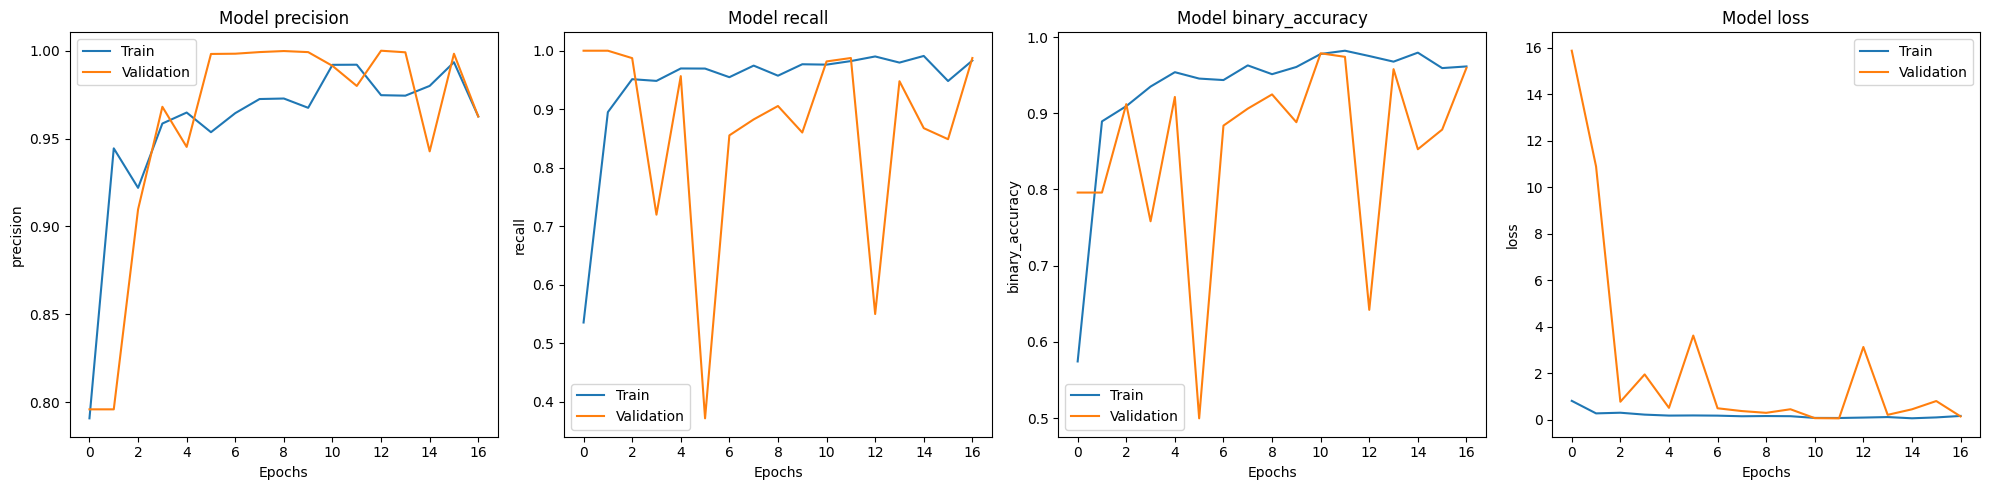

In [22]:

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax = ax.ravel()

metrics = ["precision", "recall", "binary_accuracy", "loss"]

for i, met in enumerate(metrics):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history["val_" + met])
    ax[i].set_title(f"Model {met}")
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(met)
    ax[i].legend(["Train", "Validation"])

plt.tight_layout()
plt.show()


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3498db; overflow:hidden"><b>Model Evaluation</b></div>


In [23]:
model.evaluate(test_ds, return_dict=True)

      2/Unknown 1s 51ms/step - binary_accuracy: 0.4214 - loss: 2.5127 - precision: 0.0716 - recall: 0.5000         

I0000 00:00:1741883217.600934  223233 tpu_compilation_cache_interface.cc:442] TPU host compilation cache miss: cache_key(14699464297110187541), session_name()
I0000 00:00:1741883221.383396  223233 tpu_compile_op_common.cc:245] Compilation of 14699464297110187541 with session name  took 3.781962709s and succeeded
I0000 00:00:1741883221.387691  223233 tpu_compilation_cache_interface.cc:476] TPU host compilation cache: compilation complete for cache_key(14699464297110187541), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_data_15411778630255159247", property.function_library_fingerprint = 17565833484189738030, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "24,180,180,3,;24,;", property.guaranteed_constants_size = 0, embeddin

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - binary_accuracy: 0.4418 - loss: 2.4233 - precision: 0.1254 - recall: 0.7996


{'binary_accuracy': 0.45538589358329773,
 'loss': 2.3634607791900635,
 'precision': 0.16135835647583008,
 'recall': 0.9993468523025513}

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3498db; overflow:hidden"><b>Model Prediction Metrics</b></div>


In [24]:
predictions = model.predict(test_ds)
y_pred = (predictions > 0.5).astype(int)
y_true=[]

for data,labels in test_ds:
    y_true.append(labels.numpy())
y_true = np.concatenate(y_true, axis=0)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

I0000 00:00:1741883223.239013  222326 encapsulate_tpu_computations_pass.cc:266] Subgraph fingerprint:7045307337552927688
E0000 00:00:1741883223.269942  222326 meta_optimizer.cc:966] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node functional_1/batch_normalization_1/Cast/ReadVariableOp.
I0000 00:00:1741883223.373210  223229 tpu_compilation_cache_interface.cc:442] TPU host compilation cache miss: cache_key(371564496017303605), session_name()
I0000 00:00:1741883227.625087  223229 tpu_compile_op_common.cc:245] Compilation of 371564496017303605 with session name  took 4.251809053s and succeeded
I0000 00:00:1741883227.627818  223229 tpu_compilation_cache_interface.cc:476] TPU host compilation cache: compilation complete for cache_key(371564496017303605), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_data_distributed_7045307337552927688", property.function_library_fingerprint = 7023706955041642177, property.mlir_module_finge

      3/Unknown 7s 163ms/step

I0000 00:00:1741883229.539417  222326 encapsulate_tpu_computations_pass.cc:266] Subgraph fingerprint:13783263085458856549
I0000 00:00:1741883229.817723  223216 tpu_compilation_cache_interface.cc:442] TPU host compilation cache miss: cache_key(2518552856940199907), session_name()
I0000 00:00:1741883233.446516  223216 tpu_compile_op_common.cc:245] Compilation of 2518552856940199907 with session name  took 3.628750019s and succeeded
I0000 00:00:1741883233.449161  223216 tpu_compilation_cache_interface.cc:476] TPU host compilation cache: compilation complete for cache_key(2518552856940199907), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_data_distributed_13783263085458856549", property.function_library_fingerprint = 396315176441156845, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topolo

4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step
Accuracy: 0.7628205128205128
Precision: 0.7257462686567164
Recall: 0.9974358974358974
F1 Score: 0.8401727861771058


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3498db; overflow:hidden"><b>Confusion Matrix</b></div>


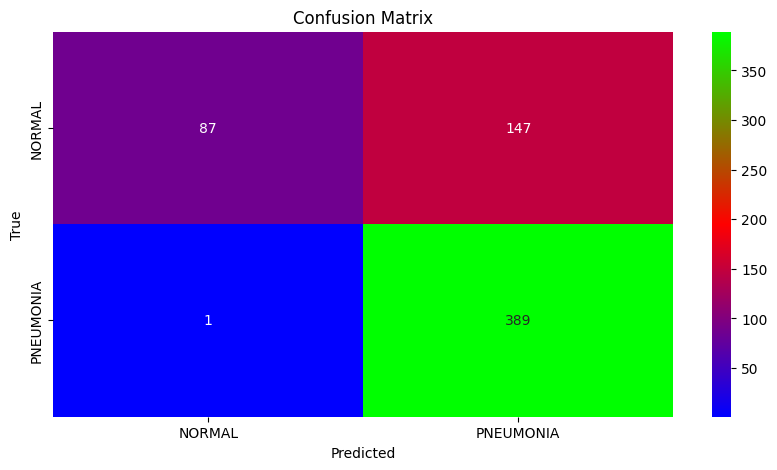

In [25]:
cm = confusion_matrix(y_true, y_pred)
label_name=CLASS_NAMES 
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='brg', xticklabels=label_name, yticklabels=label_name)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3498db; overflow:hidden"><b>Classification Report</b></div>


In [26]:
print(classification_report(y_true, y_pred,target_names=label_name))

              precision    recall  f1-score   support

      NORMAL       0.99      0.37      0.54       234
   PNEUMONIA       0.73      1.00      0.84       390

    accuracy                           0.76       624
   macro avg       0.86      0.68      0.69       624
weighted avg       0.82      0.76      0.73       624



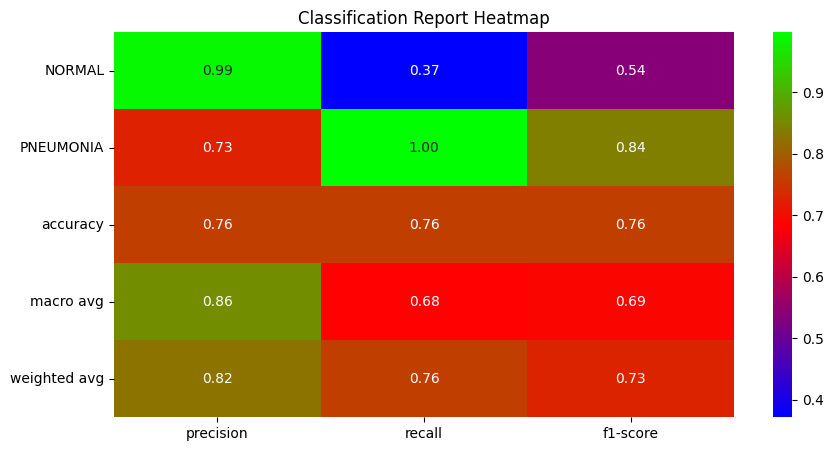

In [27]:
plt.figure(figsize=(10, 5))

report = classification_report(y_true, y_pred, target_names=label_name, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="brg", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()


<div style="font-family: Arial, sans-serif; padding: 20px; background-color: #f9f9f9; border-radius: 10px;">
  <h2 style="color: #2c3e50; text-align: center;">ROC Curve</h2>
  <p style="font-size: 16px; color: #34495e; text-align: justify;">
    The ROC (Receiver Operating Characteristic) curve is a graphical representation of the performance of a binary classification model.
    It shows the tradeoff between the True Positive Rate (TPR) and the False Positive Rate (FPR) at different thresholds. 
    The area under the ROC curve (AUC) represents the overall performance of the model. A higher AUC indicates a better model.
  </p>

  <h3 style="color: #2980b9;">Interpretation:</h3>
  <ul style="font-size: 16px; color: #34495e;">
    <li><strong>True Positive Rate (TPR):</strong> The proportion of actual positives that are correctly identified by the model.</li>
    <li><strong>False Positive Rate (FPR):</strong> The proportion of actual negatives that are incorrectly identified as positive.</li>
    <li><strong>AUC (Area Under the Curve):</strong> The area under the ROC curve, which gives a measure of the classifier's ability to distinguish between positive and negative classes. A higher AUC value indicates a better performing model.</li>
  </ul>
</div>


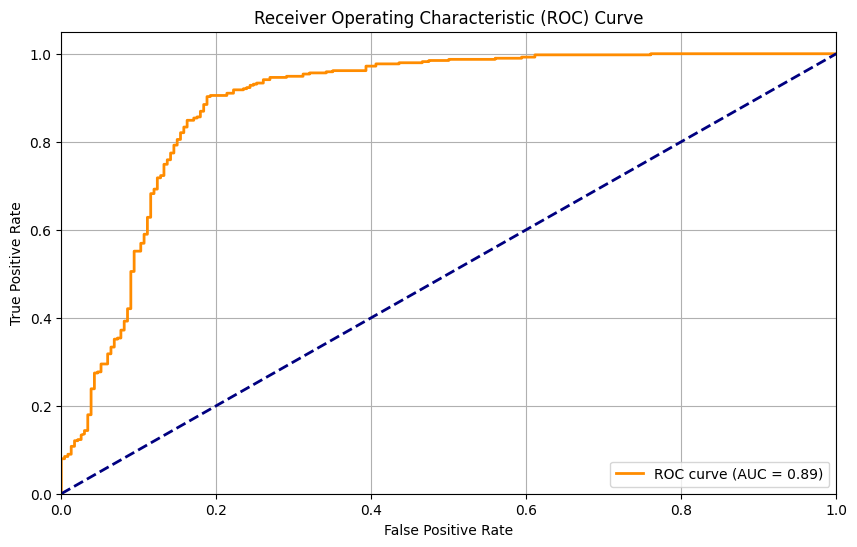

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3498db; overflow:hidden"><b>Precision Recall Curve</b></div>


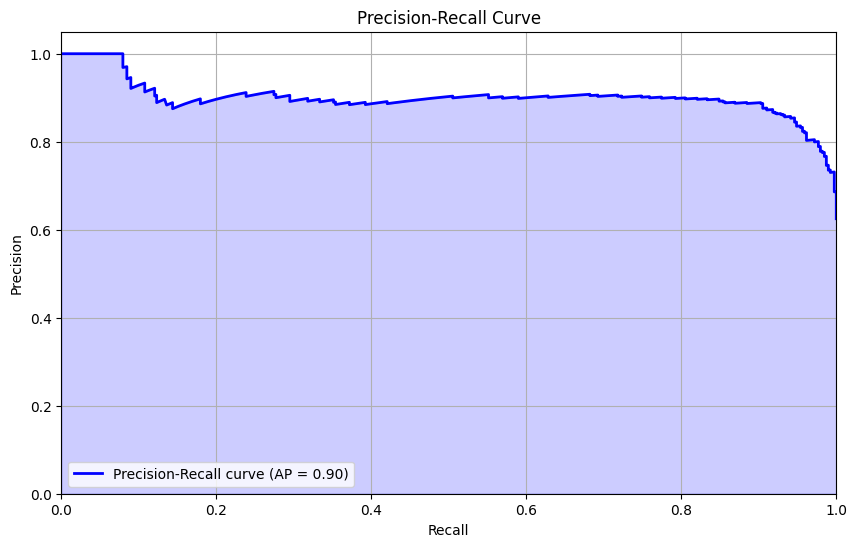

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_true, predictions)
average_precision = average_precision_score(y_true, predictions)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.fill_between(recall, precision, alpha=0.2, color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3498db; overflow:hidden"><b>Model Prediction On Test Data</b></div>


I0000 00:00:1741883236.734676  222326 encapsulate_tpu_computations_pass.cc:266] Subgraph fingerprint:15557204249418249939
I0000 00:00:1741883236.867832  223204 tpu_compilation_cache_interface.cc:442] TPU host compilation cache miss: cache_key(4948558361053679813), session_name()
I0000 00:00:1741883240.722114  223204 tpu_compile_op_common.cc:245] Compilation of 4948558361053679813 with session name  took 3.854238228s and succeeded
I0000 00:00:1741883240.724832  223204 tpu_compilation_cache_interface.cc:476] TPU host compilation cache: compilation complete for cache_key(4948558361053679813), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_data_distributed_15557204249418249939", property.function_library_fingerprint = 6320180276870689213, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topol

First image prediction scores:
This image is 64.79 percent NORMAL
This image is 35.21 percent PNEUMONIA


/tmp/ipykernel_222326/1419061194.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("This image is %.2f percent %s" % (100 * score, name))
I0000 00:00:1741883250.413657  223238 tpu_compilation_cache_interface.cc:442] TPU host compilation cache miss: cache_key(11237088539011696677), session_name()
I0000 00:00:1741883254.344912  223238 tpu_compile_op_common.cc:245] Compilation of 11237088539011696677 with session name  took 3.931214172s and succeeded
I0000 00:00:1741883254.347360  223238 tpu_compilation_cache_interface.cc:476] TPU host compilation cache: compilation complete for cache_key(11237088539011696677), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_data_distributed_8669653913362289222", property.function_library_fingerprint = 15837052073563636783, property.

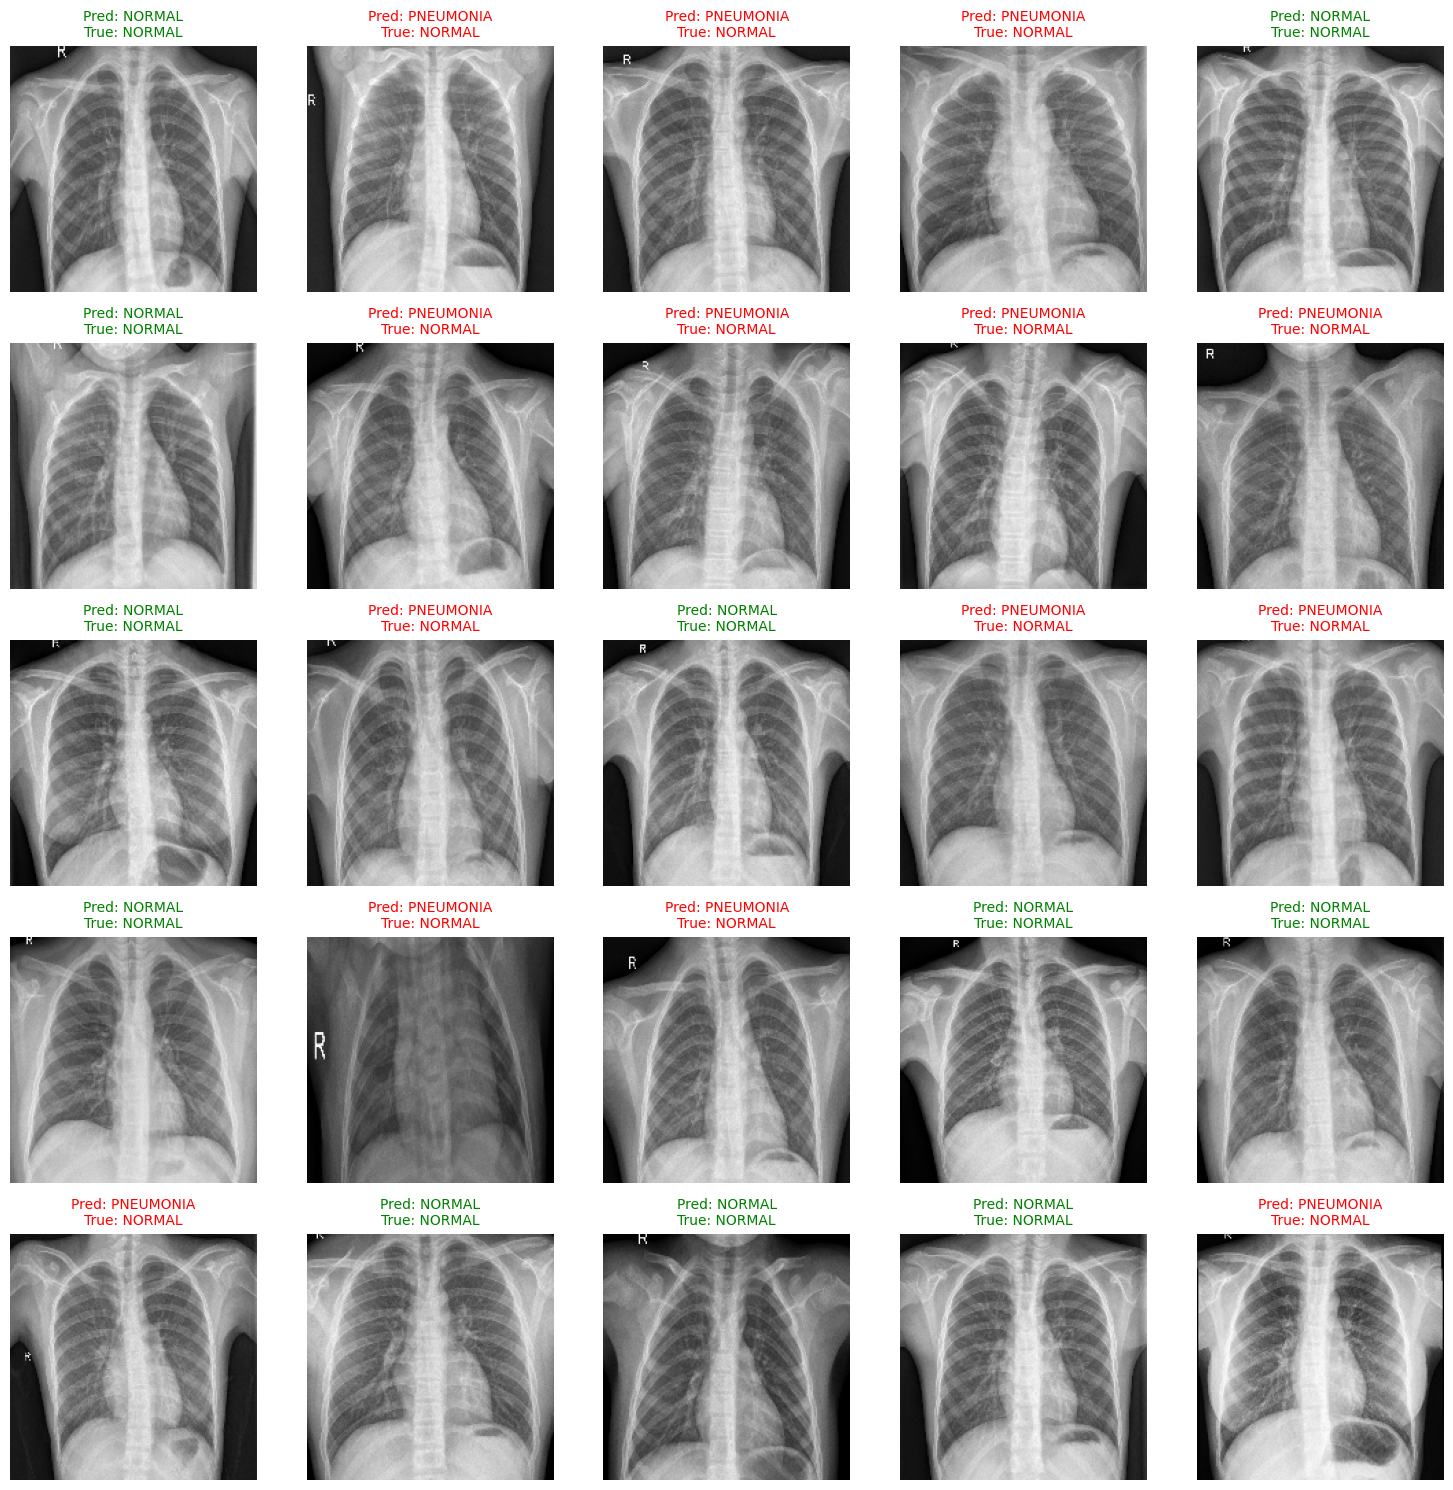

In [30]:

images_to_plot = 25
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.ravel()  # Flatten to 1D array for easy indexing

# Iterate over test_ds and get predictions
i = 0
for image_batch, label_batch in test_ds.take(images_to_plot // test_ds.cardinality().numpy() + 1):
    predictions = model.predict(image_batch, verbose=0)
    for image, label, pred in zip(image_batch, label_batch, predictions):
        if i >= images_to_plot:
            break
        
        # Normalize image to [0, 1] for display
        img = image.numpy() / 255.0
        
        # Get true and predicted labels
        true_label = label.numpy()
        pred_label = int(pred > 0.5)  # Assuming binary classification; adjust for multi-class
        
        # Set title color based on match
        title_color = 'green' if pred_label == true_label else 'red'
        
        # Plot image
        axes[i].imshow(img)
        axes[i].set_title(f"Pred: {CLASS_NAMES[pred_label]}\nTrue: {CLASS_NAMES[true_label]}", 
                         color=title_color, fontsize=10)
        axes[i].axis('off')
        
        # Print prediction scores for the first sample (as in your example)
        if i == 0:
            scores = [1 - pred, pred]
            print("First image prediction scores:")
            for score, name in zip(scores, CLASS_NAMES):
                print("This image is %.2f percent %s" % (100 * score, name))
        
        i += 1

plt.tight_layout()
plt.show()